In [1]:
#Analyze customer churn using different models

In [3]:
#import the libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#load the file
df_churn=pd.read_csv("E:\Personal\Analytics\Assignment\Angshuman\Marketing and Retail Analytics.csv")

In [5]:
df_churn.info()
df_churn.shape
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

(3333, 21)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#import the libraries
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score

C:\Users\sivaturi3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
print("Counts of Labels")
df_churn.groupby("churn").size()

Counts of Labels


churn
False    2850
True      483
dtype: int64

In [8]:
#convert True and False to 1 and 0
le=preprocessing.LabelEncoder()

In [9]:
le.fit(df_churn["churn"])

LabelEncoder()

In [10]:
list(le.classes_)

[False, True]

In [11]:
df1=le.transform(df_churn["churn"])

In [14]:
df_churn['Y']=df1

In [15]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [16]:
df_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'Y'],
      dtype='object')

In [17]:
# Seperate independent categorical variables to convert to numerical
x_catg=df_churn.loc[:,('international plan','voice mail plan')]

In [18]:
x_catg.head()

,international plan,voice mail plan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


In [19]:
x_catg.shape

(3333, 2)

In [20]:
#convert categorical var to dummy coding
x_num1=pd.get_dummies(x_catg)
x_num1.head()

,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


In [21]:
df_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'Y'],
      dtype='object')

In [22]:
#Separate independent numerical varialbles
x_num=df_churn.loc[:,('number vmail messages',
                       'total day minutes','total day calls','total day charge','total eve minutes',
                       'total eve calls','total eve charge',
                       'total night minutes','total night calls','total night charge',
                       'total intl minutes','total intl calls','total intl charge','customer service calls')]

In [23]:
x_num.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [24]:
#get all X's together
x = pd.concat([x_num1, x_num], axis=1)
x.head()

,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,1,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,1,0,1,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,1,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [25]:
#create dependent variable
y = df_churn['Y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [26]:
#create train and test data 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(2499, 18)

(834, 18)

(2499,)

(834,)

pandas.core.frame.DataFrame

In [27]:
#build logistic regression model

In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [29]:
log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
log.coef_

array([[-2.47463028e+00, -4.56716338e-01, -1.03360094e+00,
        -1.89774568e+00, -2.01015250e-03,  9.07076394e-03,
        -9.83563836e-04,  1.63053139e-02,  5.76844735e-03,
        -1.28285915e-03,  7.08055231e-04,  3.49700409e-03,
        -3.45083684e-03, -8.68875042e-03,  5.92401581e-02,
        -1.40728262e-01,  2.43432625e-02,  5.23710229e-01]])

In [31]:
#find out key predictor of churn
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis=1)
coeff.columns = ("Variable", "Coeff")
coeff.sort_values("Variable", ascending = True)

,Variable,Coeff
17,customer service calls,0.523710
0,international plan_no,-2.474630
1,international plan_yes,-0.456716
4,number vmail messages,-0.002010
6,total day calls,-0.000984
7,total day charge,0.016305
5,total day minutes,0.009071
9,total eve calls,-0.001283
10,total eve charge,0.000708
8,total eve minutes,0.005768


In [32]:
#Generate Model Diagnostics
classes = log.predict(test_x)
print(classes.size)

834


In [33]:
#precision and recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y, classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y, classes))
print('AUC')
auc = metrics.roc_auc_score(test_y, classes)
auc

Accuracy Score
0.854916067146283
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.87      0.97      0.92       712
          1       0.51      0.16      0.24       122

avg / total       0.82      0.85      0.82       834

AUC


0.5652284030208141

confusion metrics


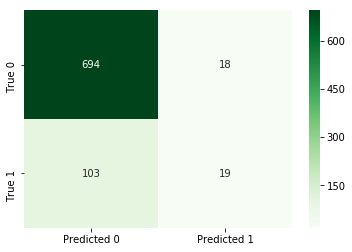

In [34]:
#confusion metrix
print("confusion metrics")
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

In [35]:
#Try Naive Bayes

In [36]:
from sklearn import naive_bayes

In [37]:
#Train NB classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [38]:
gnb.fit(train_x,train_y)

GaussianNB(priors=None)

In [39]:
y_pred=gnb.predict(test_x)

In [40]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [41]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(test_y,y_pred))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,y_pred))
print('AUC')
auc=metrics.roc_auc_score(test_y,y_pred)
auc

Accuracy Score
0.8501199040767387
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.91      0.92      0.91       712
          1       0.49      0.46      0.47       122

avg / total       0.85      0.85      0.85       834

AUC


0.6880756124516487

In [42]:
#Try Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\sivaturi3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
clf=RandomForestClassifier(n_estimators=100)

In [45]:
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
y_pred=clf.predict(test_x)

In [47]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(test_y,y_pred))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,y_pred))
print('AUC')
auc=metrics.roc_auc_score(test_y,y_pred)
auc

Accuracy Score
0.9496402877697842
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       712
          1       0.89      0.75      0.81       122

avg / total       0.95      0.95      0.95       834

AUC


0.8652261005710076